In [32]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|brick-sign|');
span {font-family:Roboto; color:black; text-shadow:4px 4px 4px #aaa;}  
h1,h2 {font-family:Roboto; color:slategray; text-shadow:4px 4px 4px #aaa;} 
div.output_subarea, div.output_area pre{font-family:Roboto; font_size:120%; color:darkblue;}
</style> 

In [80]:
import math, sympy, numpy
sympy.init_printing(use_unicode=True)
from sympy import *
from mpmath import *
from sympy.physics.vector import *

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import pylab as plt
%matplotlib inline

[Computer Algebra I: Mathematica, SymPy, Sage, Maxima](http://hyperpolyglot.org/computer-algebra2)

[SymPy. Vector & ReferenceFrame](https://docs.sympy.org/latest/modules/physics/vector/vectors.html)

[LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

[МЦНМО. Свободно распространяемые издания](https://www.mccme.ru/free-books/)

# Типовой расчет 10 / Standard Calculation 10

## Постановка  задачи / Formulation of the problem:

Даны два геометрических вектора $\overline{P}$ и $\overline{Q}$.

Представить вектор $\overline{P}$ в виде суммы двух векторов $\overline{P_1}$ и $\overline{P_2}$ таких, что 

- вектор $\overline{P_1}$ перпендикулярен вектору $\overline{Q}$,

- а вектор $\overline{P_2}$ вектору $\overline{Q}$ коллинеарен.

$\overline{P} = (3, 4, 1); \overline{Q} = (1, 2, 1)$

In [34]:
V = ReferenceFrame('V')
P = 3 * V.x + 4 * V.y + 1 * V.z
Q = 1 * V.x + 2 * V.y + 1 * V.z

In [35]:
P 

In [36]:
Q

## Решение / Decision

Пусть $\overline{P_1} = (x_1, x_2, x_3); \overline{P_2} = (x_4, x_5, x_6)$.

$\overline{P} = \overline{P_1}  + \overline{P_2} \implies
\begin{cases}
x_1 + x_4 = 3 \\
x_2 + x_5 = 4 \\
x_3 + x _6 = 1
\end{cases} \iff
\begin{cases}
x_4 = 3 - x_1 \\
x_5 = 4 - x_2 \\
x_6 = 1 - x _3
\end{cases} \ (1)$

$\overline{P_1}  \perp \overline{Q} \implies 1 * x_1 + 2 * x_2 + 1 * x_3 = 0 \implies x_1 = -2x_2 - x_3 \ (2)$

$\overline{P_2}  \parallel \overline{Q} \implies 
\begin{cases}
\lambda * x_4  = 1 \\
\lambda * x_5  = 2 \\
\lambda * x_6 = 1 \\
\end{cases} \ (3)$

Подставим в (3) равенства (1) и (2):

$
\begin{cases}
\lambda * (3 + 2x_2 + x_3)  = 1 \\
\lambda * (4 - x_2)  = 2 \\
\lambda * (1 - x_3) = 1 
\end{cases} \iff
\begin{cases}
3 + 2x_2 + x_3  = 1 / \lambda \\
4 - x_2  = 2 / \lambda \\
1 - x_3 = 1 / \lambda\\
\end{cases}
$

Из второго равенства полученной системы вычтем первое и третье:

$4 - x_2  - 3 - 2x_2 - x_3 - 1 + x_3 = 2 / \lambda - 1 / \lambda - 2 / \lambda \iff -3x_2 = 0 \iff x_2 = 0$

Из первого равенства вычтем третье:

$3 + 2x_2 + x_3  - 1 + x_3 = 1 / \lambda - 1 / \lambda \iff 2x_3 = -2 - 2x_2 \iff x_3 = -1 -x_2 \implies x_3 = -1$

$x_1 = -2 * 0 -(-1) = 1$

$x_4 = 3 - 1 = 2; x_5 = 4 - 0 = 4; x_6 = 1 - (-1) = 2$ 

$\lambda = 1 / (1 - (-1)) = 0.5$

$\overline{P_1} = (1, 0, -1); \overline{P_2} = (2, 4, 2)$

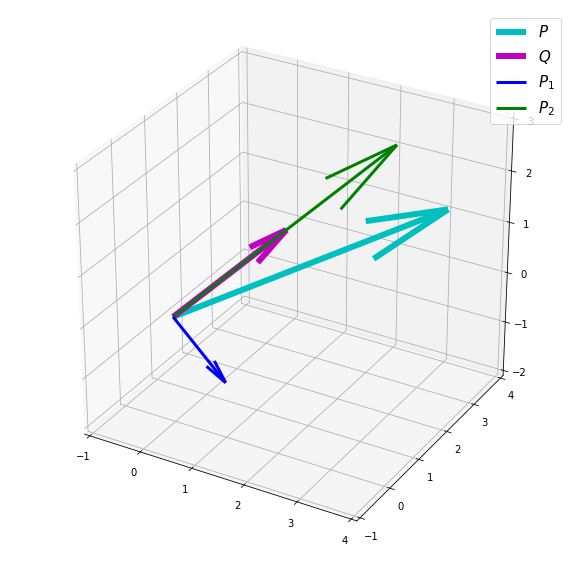

In [118]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111, projection='3d')
l = ['$P$','$Q$','$P_1$','$P_2$']; c = ['c','m','b','g']; lw=[6,6,3,3]
x = [3,1,1,2]; y = [4,2,0,4]; z = [1,1,-1,2]
ax.set_xlim([-1,4]); ax.set_ylim([-1,4]); ax.set_zlim([-2,3])
for i in range(4):
    ax.quiver(0, 0, 0, x[i], y[i], z[i], lw=lw[i], color=c[i], label=l[i])
ax.legend(fontsize=15);

In [37]:
P1 = 1 * V.x + 0 * V.y - 1 * V.z
P2 = 2 * V.x + 4 * V.y + 2 * V.z

In [38]:
P1 + P2

In [40]:
P1 + P2 == P

True

In [41]:
# P1⊥Q
dot(P1, Q)

In [43]:
0.5 * P2

In [42]:
# P2||Q, λ= 0.5
0.5 * P2 == Q

True

# Типовой расчет 11 / Standard Calculation 11

## Постановка  задачи / Formulation of the problem:

В ромбе $ABCD$ даны уравнения двух его сторон $AB$ и $AD$, а также координаты вершины $C$.

Найти площадь ромба.

$AB: 9X - 11Y + 2 = 0; AD: 11X - 9Y - 2 = 0; C = (21,21)$.

## Решение / Decision

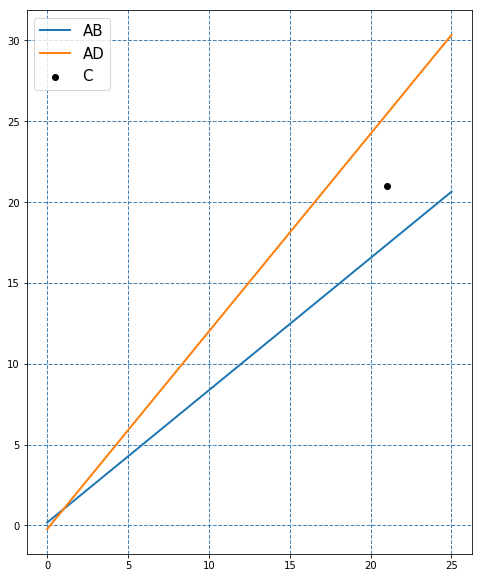

In [119]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111, aspect=1)
ax.grid(c='steelblue', ls='--', lw=1)

x = numpy.linspace(0,25)
y1 = [(9 * el + 2) / 11 for el in x]
y2 = [(11 * el - 2) / 9 for el in x]

ax.plot(x, y1, lw=2, label='AB')
ax.plot(x, y2, lw=2, label='AD')
ax.scatter(21,21, label='C', color='black');
ax.legend(fontsize=15);

# Типовой расчет 12 / Standard Calculation 12

## Постановка  задачи / Formulation of the problem:

Найти точку, симметричную данной точке $A$ относительно прямой, 

- проходящей через данную точку $B$ и 
- перпендикулярной данной плоскости $\alpha$.

$A = (17, 15, 22); B = (3, 1, 8); \alpha: X + 2Y - 3Z +12 = 0$.

## Решение / Decision

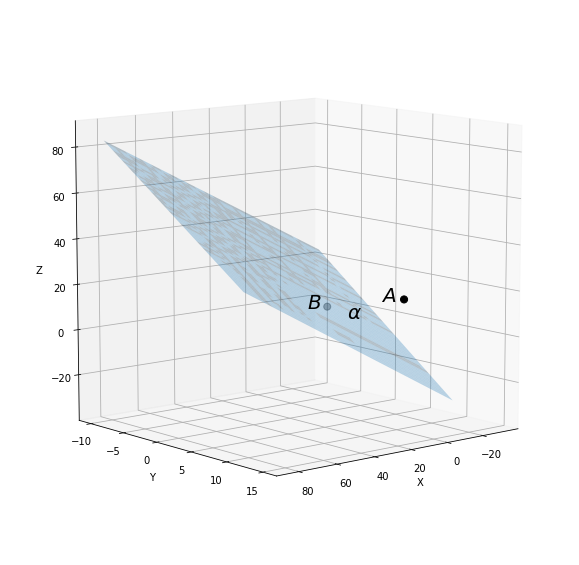

In [397]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111, projection='3d')

y = numpy.linspace(-10, 10)
z = numpy.linspace(0, 25)
y, z = numpy.meshgrid(y, z)
x = - 2 * y + 3 * z - 12; t=4

ax.scatter([17, 3],[15, 1],[22, 8], s=50, c='black')
ax.text(17-t,15-t,22-t,'$A$', fontsize=20)
ax.text(3-t,1-t,8.-t,'$B$', fontsize=20)
ax.text(-12,0,0,'$α$', fontsize=20)
ax.plot_surface(x, y, x, alpha=0.3)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.view_init(10,50);